**Nama : Satria Ishanda Subakti**</br>
**Nim : 211351135**</br>
**Prodi : Teknik Informatika (Pagi B)**</br>

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"satriaishandasubakti","key":"f714982a67c4e0fa8a74f45e837555c4"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [5]:
!kaggle datasets download -d lashagoch/life-expectancy-who-updated

  0% 0.00/104k [00:00<?, ?B/s]
100% 104k/104k [00:00<00:00, 76.2MB/s]


In [6]:
!mkdir life-expectancy-who-updated
!unzip life-expectancy-who-updated.zip -d life-expectancy-who-updated
!ls life-expectancy-who-updated

Archive:  life-expectancy-who-updated.zip
  inflating: life-expectancy-who-updated/Life-Expectancy-Data-Updated.csv  
Life-Expectancy-Data-Updated.csv


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
df = pd.read_csv('life-expectancy-who-updated/Life-Expectancy-Data-Updated.csv')

In [ ]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [ ]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


In [27]:
df["Region"].value_counts()

Africa                           816
European Union                   432
Asia                             432
Central America and Caribbean    304
Rest of Europe                   240
Middle East                      224
South America                    192
Oceania                          176
North America                     48
Name: Region, dtype: int64

In [31]:
df.sort_values(by="Region", ascending=True).head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
2296,Ghana,Africa,2003,58.0,88.5,293.6475,1.91,80,55,22.9,...,80,1.48,1105,20.75,8.6,8.5,6.3,0,1,57.8
769,Sierra Leone,Africa,2015,95.1,140.2,397.8705,3.06,86,60,22.7,...,86,0.85,588,7.17,7.4,7.3,3.4,0,1,52.9
1996,Kenya,Africa,2001,57.8,94.2,484.2665,1.64,77,28,22.1,...,80,4.36,1157,32.85,9.0,9.0,5.4,0,1,51.1
771,Burkina Faso,Africa,2013,62.7,108.3,267.2085,5.49,88,34,22.0,...,88,0.23,639,17.07,8.4,7.9,1.4,0,1,58.9
773,Mauritius,Africa,2007,13.0,15.2,157.4485,3.23,97,80,24.9,...,97,1.05,6939,1.24,7.5,7.4,7.6,0,1,72.6


<Axes: >

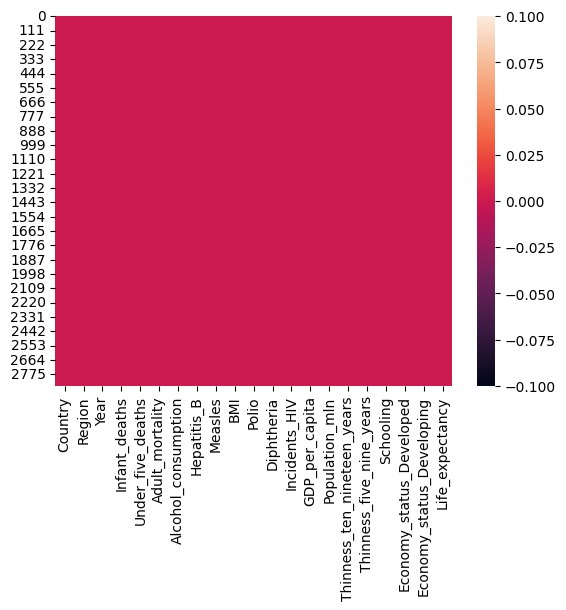

In [ ]:
sns.heatmap(df.isnull())

<ipython-input-12-ee535b2cc5be>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

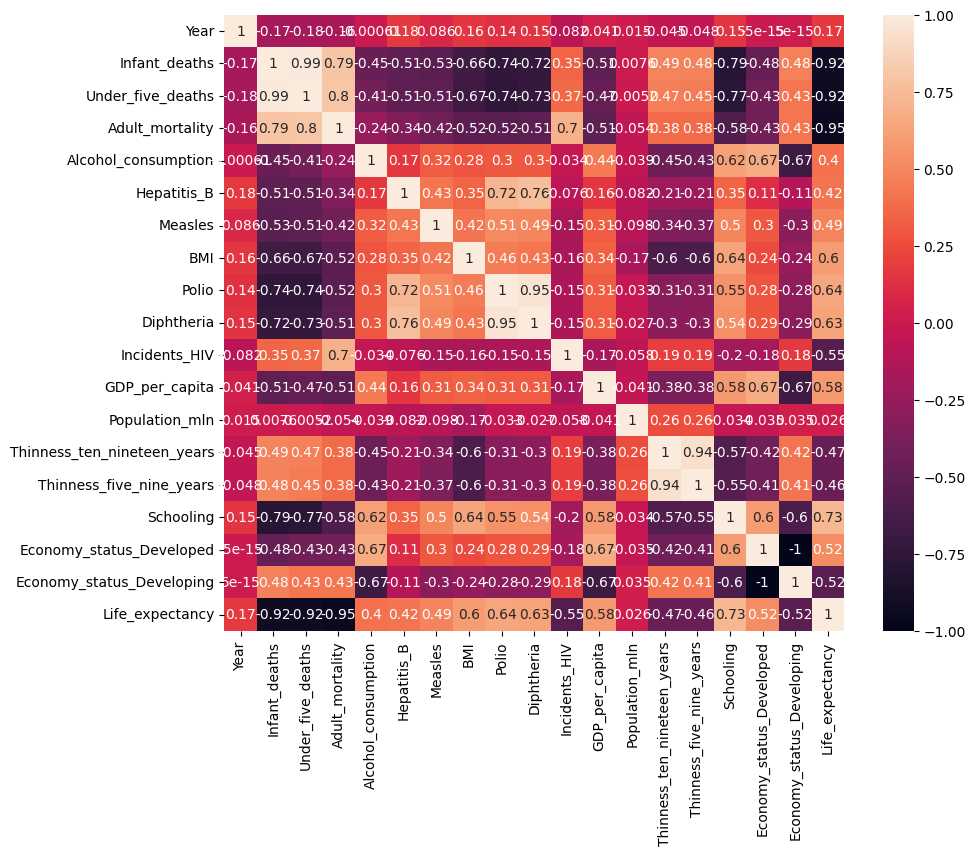

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [28]:
life = df.groupby('Region').count()[['Life_expectancy']].sort_values(by='Life_expectancy', ascending=True).reset_index()
life = life.rename(columns={'Life_expectancy':'life'})

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'North America'),
  Text(1, 0, 'Oceania'),
  Text(2, 0, 'South America'),
  Text(3, 0, 'Middle East'),
  Text(4, 0, 'Rest of Europe'),
  Text(5, 0, 'Central America and Caribbean'),
  Text(6, 0, 'Asia'),
  Text(7, 0, 'European Union'),
  Text(8, 0, 'Africa')])

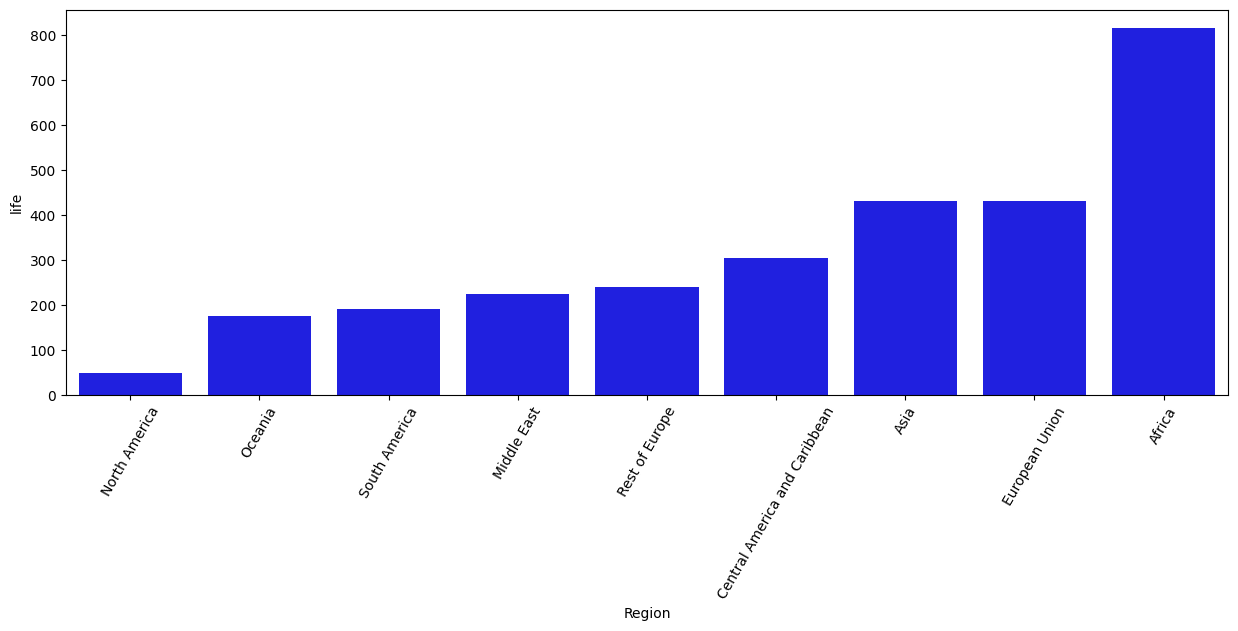

In [29]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=life['Region'], y=life['life'], color='blue')
plt.xticks(rotation=60)

<ipython-input-10-f534cad600b2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Polio'])


<Axes: xlabel='Polio', ylabel='Density'>

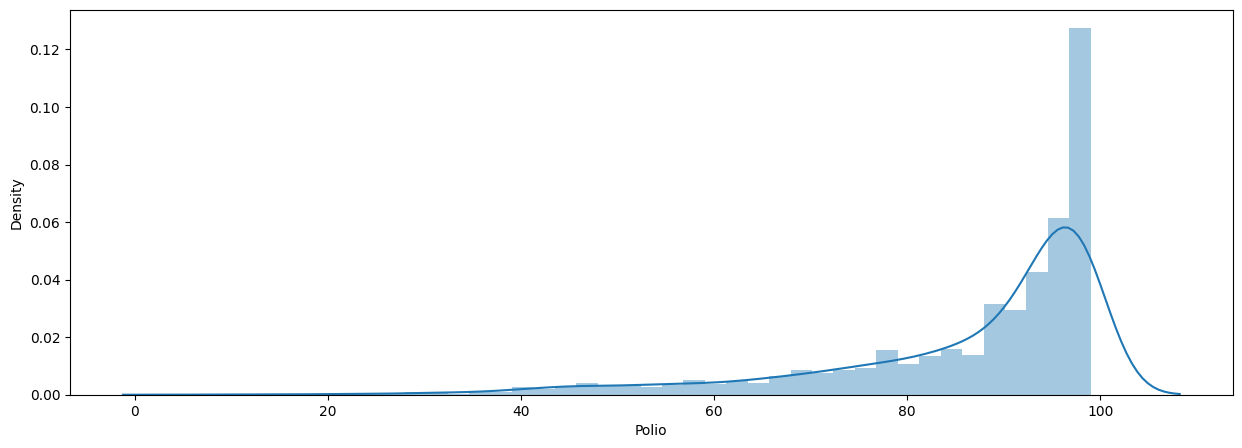

In [10]:
plt.figure(figsize=(15,5))
sns.distplot(df['Polio'])

<ipython-input-16-3ccb2d0f9939>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Incidents_HIV'])


<Axes: xlabel='Incidents_HIV', ylabel='Density'>

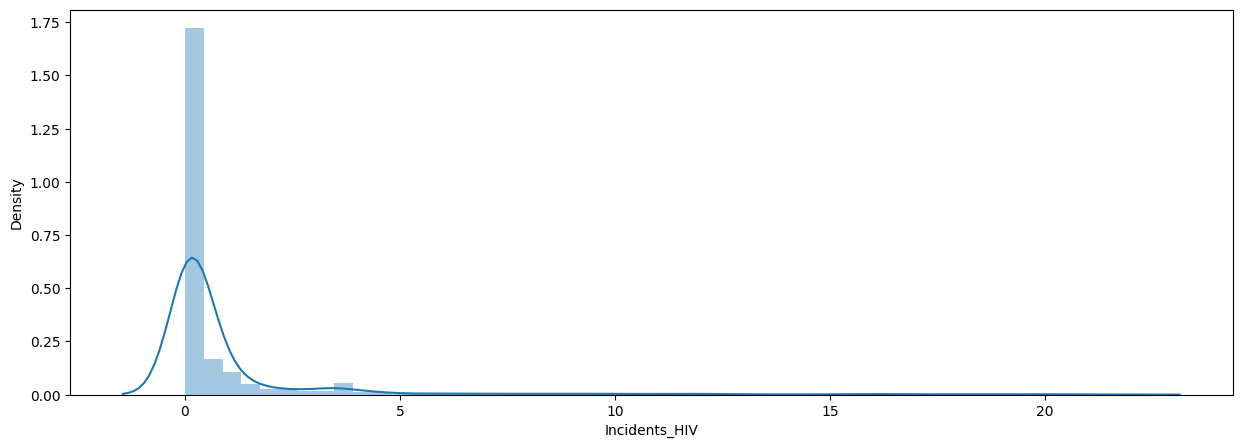

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df['Incidents_HIV'])

In [11]:
report = ['Year', 'Hepatitis_B', 'Measles', 'Polio', 'Diphtheria', 'Alcohol_consumption', 'Incidents_HIV', 'BMI']
x = df[report]
y = df['Life_expectancy']
x.shape, y.shape

((2864, 8), (2864,))

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Hepatitis_B'}>,
        <Axes: title={'center': 'Measles'}>],
       [<Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Diphtheria'}>,
        <Axes: title={'center': 'Alcohol_consumption'}>],
       [<Axes: title={'center': 'Incidents_HIV'}>,
        <Axes: title={'center': 'BMI'}>, <Axes: >]], dtype=object)

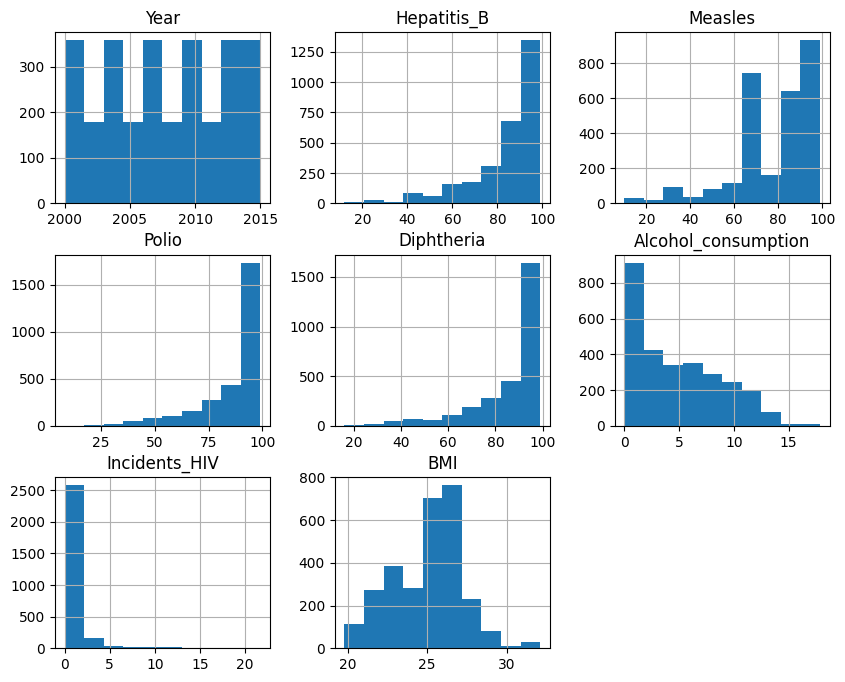

In [17]:
df[report].hist(figsize=(10,8))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(716,)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [ ]:
value = lr.score(x_test, y_test)
print('Akurasi Model regresi linier = ', value)

Akurasi Model regresi linier =  0.7392315286502513


In [ ]:
input_data = np.array([[2015, 97, 94, 97, 97, 10.35, 0.09, 26]])

prediction = lr.predict(input_data)
print('estimasi angka harapan hidup:', prediction)

estimasi angka harapan hidup: [76.84378335]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import r2_score
score_of_r2 = r2_score(y_test, pred)
print(f"Precision = {score_of_r2}")

Precision = 0.7392315286502513


In [ ]:
import pickle

filename = 'life_expectancy.sav'
pickle.dump(lr,open(filename,'wb'))